# **Image Classification on CIFAR-10 using CNN**

## Introduction
In this project, we'll build a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. This dataset contains 60,000 images (32x32 pixels, RGB) categorized into 10 classes:
Classes:
Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck

We'll follow these steps:

Load and understand the dataset

Preprocess the images and labels

Build a CNN using Keras

Train and evaluate the model

Visualize results and predictions



 ## Import Required Libraries
 These libraries help with deep learning, data handling, and visualization.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report, confusion_matrix


## Load and Explore the CIFAR-10 Dataset
The CIFAR-10 dataset is a built-in dataset in Keras that consists of:

50,000 training images

10,000 test images

Each image is of shape 32x32 pixels and has 3 color channels (RGB)

In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Show the shape of the data
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


This tells us:

We have 50,000 training images and 10,000 test images.

Each image is 32x32 pixels with 3 color channels (RGB).

Labels are single integers (0 to 9).

## Visualize Sample Images from CIFAR-10
Before training the model, it's important to understand what the data looks like. We'll plot a few images along with their corresponding labels.

In [4]:
# Define class labels for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


Now, let’s visualize 10 images from the training set:

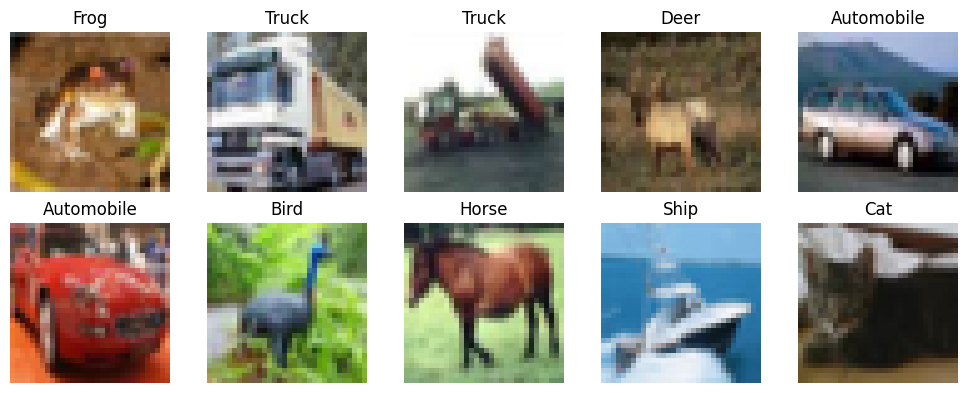

In [5]:
# Plot first 10 images with their class names
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')

plt.tight_layout()
plt.show()


 This will help us:

*   Understand the image size and quality.
*   See the class balance visually.

## Preprocess the Data
Before feeding the data into our CNN, we need to:

1.   Normalize the pixel values to be between 0 and 1 (CNNs train better this way).
2.   One-hot encode the labels (convert class numbers into vectors).

In [6]:
# Normalize the pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels (for 10 classes)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


## Build the CNN Model
We'll use a simple yet powerful architecture:

1.  2 Convolution + Pooling layers to extract features
2.  Flatten the output
3. Fully connected (Dense) layers to classify into 10 categories
4. Dropout to prevent overfitting






In [7]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),  # New layer
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),  # Increased size
    Dropout(0.5),
    Dense(10, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


## Data Augmentation


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit to your training data
datagen.fit(x_train)


## Train the Model
Now it’s time to train the model on the CIFAR-10 dataset.
We’ll train for 10 epochs, and use 20% of training data for validation.

In [18]:
from sklearn.model_selection import train_test_split

# Split into train and validation manually
x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train_cat, test_size=0.2, random_state=42
)



In [19]:
# Create the training data generator
train_generator = datagen.flow(x_train_new, y_train_new, batch_size=64)


In [20]:
# Train the model using the generator
history = model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=len(x_train_new) // 64,
    validation_data=(x_val, y_val),
    verbose=2
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 - 91s - 146ms/step - accuracy: 0.6534 - loss: 1.0223 - val_accuracy: 0.7939 - val_loss: 0.6315
Epoch 2/20
625/625 - 130s - 207ms/step - accuracy: 0.6770 - loss: 0.9505 - val_accuracy: 0.7747 - val_loss: 0.6579
Epoch 3/20
625/625 - 79s - 127ms/step - accuracy: 0.6839 - loss: 0.9215 - val_accuracy: 0.7922 - val_loss: 0.6168
Epoch 4/20
625/625 - 79s - 127ms/step - accuracy: 0.6897 - loss: 0.8974 - val_accuracy: 0.7650 - val_loss: 0.6819
Epoch 5/20
625/625 - 81s - 130ms/step - accuracy: 0.6984 - loss: 0.8772 - val_accuracy: 0.7551 - val_loss: 0.7317
Epoch 6/20
625/625 - 80s - 129ms/step - accuracy: 0.7032 - loss: 0.8648 - val_accuracy: 0.7511 - val_loss: 0.7017
Epoch 7/20
625/625 - 80s - 127ms/step - accuracy: 0.7094 - loss: 0.8442 - val_accuracy: 0.7861 - val_loss: 0.6231
Epoch 8/20
625/625 - 84s - 134ms/step - accuracy: 0.7116 - loss: 0.8356 - val_accuracy: 0.7750 - val_loss: 0.6303
Epoch 9/20
625/625 - 81s - 130ms/step - accuracy: 0.7151 - loss: 0.8296 - val_accuracy: 0.7808 - v

## Evaluate the Model on Test Data
Now let’s test how well the model performs on unseen test images (10,000 images).

In [21]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"\n🎯 Test Accuracy: {test_acc:.2%}")


313/313 - 5s - 15ms/step - accuracy: 0.7645 - loss: 0.7221

🎯 Test Accuracy: 76.45%


 ## Classification Report & Confusion Matrix
 Now we’ll evaluate the model more deeply:
1. See how well it performs per class
2. Identify where it's confusing categories (e.g., cat vs dog)



In [22]:
# Predict class probabilities
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = y_test.flatten()


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


### Classification Report:

In [23]:
# Print classification report
print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

    Airplane       0.76      0.81      0.78      1000
  Automobile       0.88      0.88      0.88      1000
        Bird       0.76      0.62      0.68      1000
         Cat       0.69      0.50      0.58      1000
        Deer       0.78      0.70      0.74      1000
         Dog       0.80      0.58      0.68      1000
        Frog       0.73      0.89      0.80      1000
       Horse       0.72      0.87      0.79      1000
        Ship       0.81      0.89      0.85      1000
       Truck       0.73      0.91      0.81      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



### Confusion Matrix:

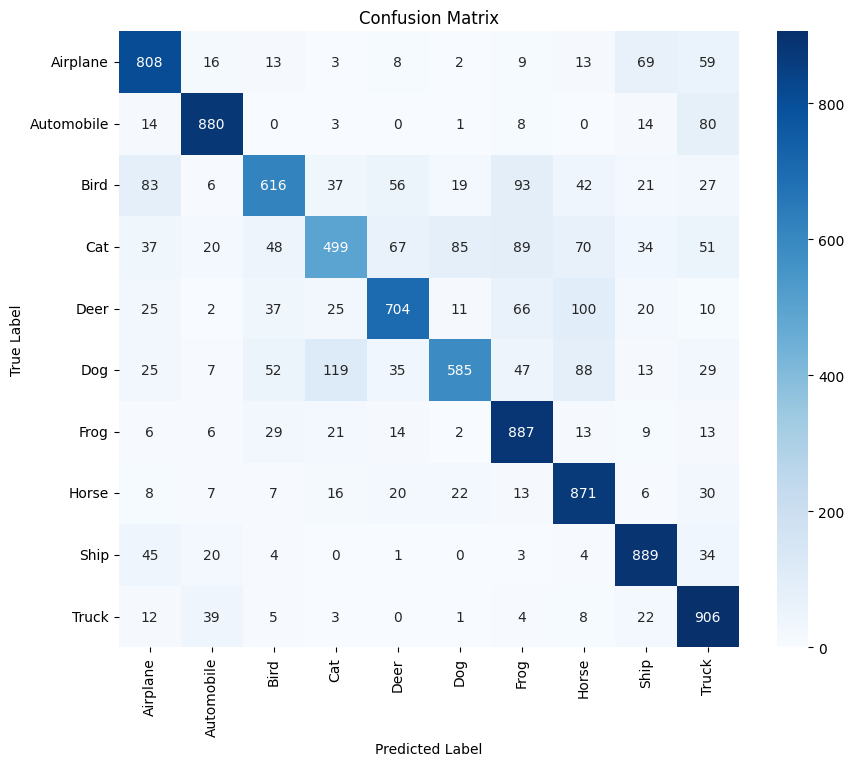

In [24]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### Visualize Predictions

/tmp/ipython-input-14-4233066388.py:16: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-4233066388.py:16: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


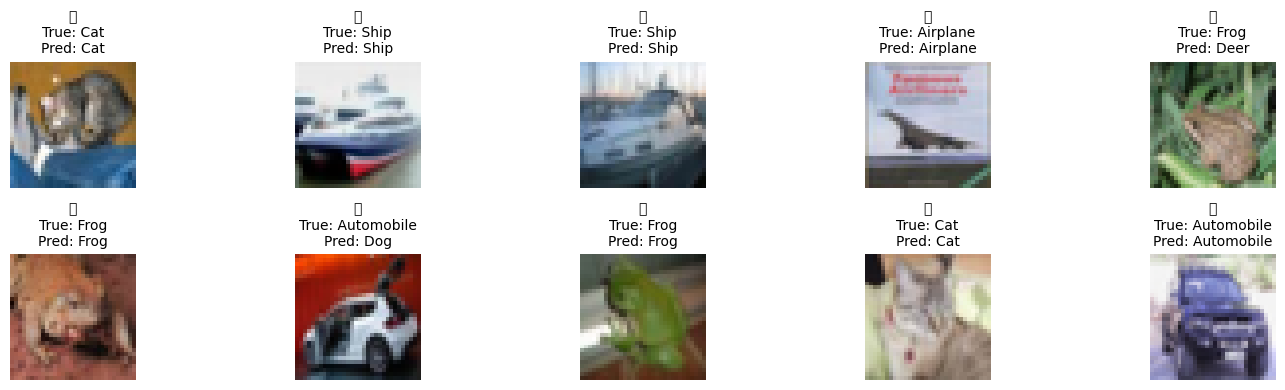

In [14]:
# Visualize predictions
num_images = 10
plt.figure(figsize=(15, 4))

for i in range(num_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])

    true_label = class_names[y_true_classes[i]]
    pred_label = class_names[y_pred_classes[i]]

    correct = '✅' if true_label == pred_label else '❌'
    plt.title(f"{correct}\nTrue: {true_label}\nPred: {pred_label}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


### Conclusion

In this project, we successfully built a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset into 10 object categories. Starting with a basic model, we achieved an initial test accuracy of 67.07%. By applying two key improvements — deepening the CNN architecture and using data augmentation techniques — we were able to significantly boost the model’s performance to a final test accuracy of 76.45%.

This demonstrates the effectiveness of:
1. Deeper convolutional layers for richer feature extraction,
2. Data augmentation for better generalization and reduced overfitting.

The model was evaluated using classification reports, confusion matrices, and prediction visualizations to ensure interpretability and reliability. This end-to-end workflow is a solid baseline for future projects involving more complex datasets or real-world deployment.